# Overview
This notebook test the perfomances of OCT2Hist model on a reference dataset described oin [our paper](https://www.medrxiv.org/content/10.1101/2021.03.31.21254733v1).

To get started,
[open this notebook in colab](https://colab.research.google.com/github/WinetraubLab/OCT2Hist-UseModel/blob/main/test_run_oct2hist_without_preprocess.ipynb) and run.

## Notebook's Inputs:

In [ ]:
# Image folder
oct_input_image_path = "/content/drive/Shareddrives/Yolab - Current Projects/_Datasets/2020-11-10 10x OCT2Hist Model (Paper V2)/Results/TestSet/"

# Define input images
input_oct_image_paths = [
 (oct_input_image_path + "LE-03-Slide04_Section01_yp0_patch01_real_A.png"), # Used in Paper Figure 3.b
 (oct_input_image_path + "LG-19-Slide04_Section02_yp0_patch01_real_A.png"), # Used in Paper Figure 3.c
 (oct_input_image_path + "LF-01-Slide04_Section02_yp0_patch01_real_A.png"), # Used in Paper Figure 3.d
 (oct_input_image_path + "LG-44-Slide05_Section03_yp0_patch01_real_A.png"), # Used in Paper Figure 3.e
]

## Set Up Environment

In [ ]:
if not 'setup_env_oct2Hist_usemodel' in globals():
  setup_env_oct2Hist_usemodel = True
  !git clone --recurse-submodules https://github.com/WinetraubLab/OCT2Hist-ModelInference
  %run /content/OCT2Hist-ModelInference/setup_env.ipynb
from utils.show_images import *
from utils.crop import crop
from utils.masking import mask_image
import cv2
import matplotlib.pyplot as plt
import numpy as np

Cloning into 'OCT2Hist-ModelInference'...
remote: Enumerating objects: 508, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 508 (delta 0), reused 0 (delta 0), pack-reused 504
Receiving objects: 100% (508/508), 16.93 MiB | 16.01 MiB/s, done.
Resolving deltas: 100% (257/257), done.
Submodule 'pytorch-CycleGAN-and-pix2pix' (https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix) registered for path 'pytorch-CycleGAN-and-pix2pix'
Cloning into '/content/OCT2Hist-ModelInference/pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2513, done.        
remote: Total 2513 (delta 0), reused 0 (delta 0), pack-reused 2513        
Receiving objects: 100% (2513/2513), 8.20 MiB | 16.20 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.
Submodule path 'pytorch-CycleGAN-and-pix2pix': checked out '9f8f61e5a375c2e01c5187d093ce9c2409f409b0'
Mounted at /content/drive/
/content/OCT2Hist-ModelInference
Drive already mounted at /conte

In [ ]:
# Inputs are path to the oct image (we can extract the file paths from the oct), and virtual histology images
def display_images(input_oct_image_paths,model_virtual_histology_images):
  fig = plt.figure(figsize=(13, 10))

  for i in range(len(input_oct_image_paths)):
    input_oct_image_path = input_oct_image_paths[i]

    input_oct_image = cv2.imread(input_oct_image_path)
    fig.add_subplot(len(input_oct_image_paths), 4, i*4+1)
    plt.imshow(input_oct_image)
    plt.axis('off')
    if i==0:
      plt.title('OCT Input')

    fig.add_subplot(len(input_oct_image_paths), 4, i*4+2)
    plt.imshow(model_virtual_histology_images[i])
    plt.axis('off')
    if i==0:
      plt.title('Virtual Histology\n(Current Model)')

    paper_virtual_histology_image = cv2.imread(input_oct_image_path.replace("_real_A", "_fake_B"))
    paper_virtual_histology_image = cv2.cvtColor(paper_virtual_histology_image, cv2.COLOR_BGR2RGB)
    fig.add_subplot(len(input_oct_image_paths), 4, i*4+3)
    plt.imshow(paper_virtual_histology_image)
    plt.axis('off')
    if i==0:
      plt.title('Virtual Histology\n(Paper Reference)')

    ground_truth_histology_image = cv2.imread(input_oct_image_path.replace("_real_A", "_real_B"))
    ground_truth_histology_image = cv2.cvtColor(ground_truth_histology_image, cv2.COLOR_BGR2RGB)
    fig.add_subplot(len(input_oct_image_paths), 4, i*4+4)
    plt.imshow(ground_truth_histology_image)
    plt.axis('off')
    if i==0:
      plt.title('Histology Ground Truth')
plt.show()

## Loop over all images and compare

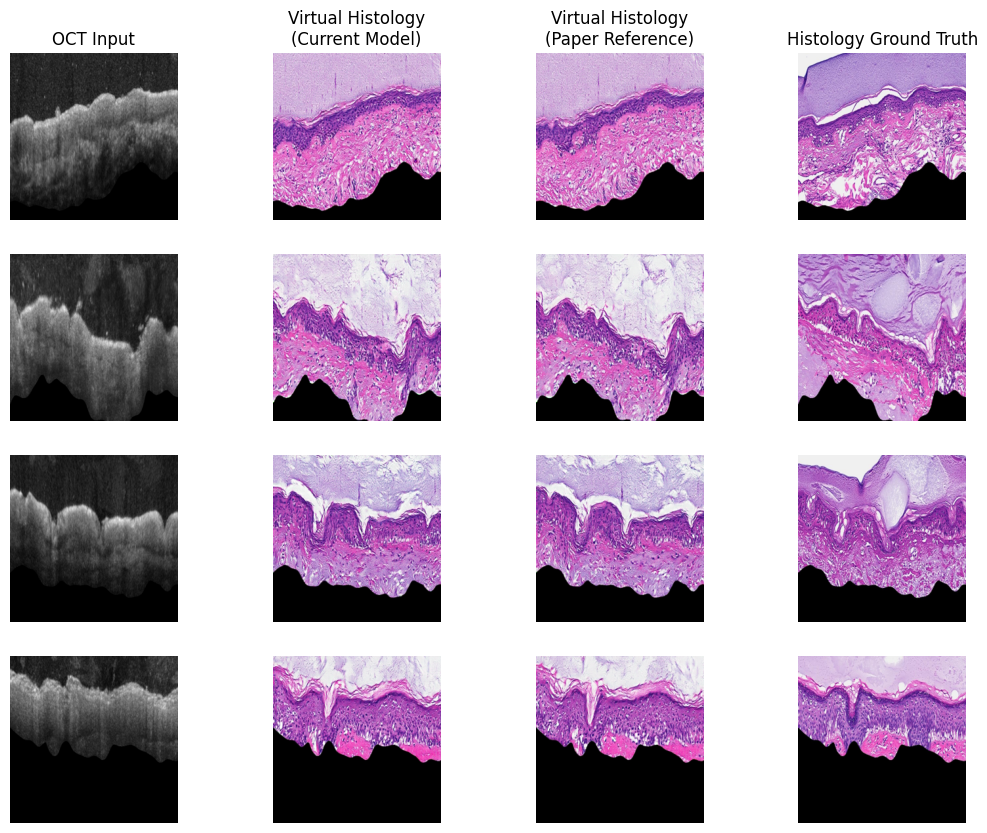

In [ ]:
# Create container for output images
model_virtual_histology_images = []

for input_oct_image_path in input_oct_image_paths:

  # Load image
  input_oct_image = cv2.imread(input_oct_image_path)

  # Run Inference
  model_virtual_histology_image = pix2pix.run_network(input_oct_image)
  model_virtual_histology_images.append(model_virtual_histology_image)

# Present results
display_images(input_oct_image_paths,model_virtual_histology_images)